In [1]:
# link = "https://fifemon.fnal.gov/kibana/app/kibana#/visualize/edit/33d02c40-8b41-11ee-804b-5759672b811c?_g=(refreshInterval:(pause:!t,value:0),time:(from:'2022-01-01T06:00:00.000Z',mode:absolute,to:'2023-11-25T03:09:25.714Z'))&_a=(filters:!(),linked:!f,query:(language:lucene,query:'Jobsub_Group:dune'),uiState:(vis:(params:(sort:(columnIndex:!n,direction:!n)))),vis:(aggs:!((enabled:!t,id:'1',params:(field:SlotHours),schema:metric,type:sum),(enabled:!t,id:'3',params:(field:MachineAttrGLIDEIN_DUNESite0,missingBucket:!f,missingBucketLabel:Missing,order:desc,orderBy:'1',otherBucket:!f,otherBucketLabel:Other,size:50),schema:bucket,type:terms),(enabled:!t,id:'5',params:(customInterval:'2h',drop_partials:!f,extended_bounds:(),field:'@timestamp',interval:M,min_doc_count:1,timeRange:(from:'2022-01-01T06:00:00.000Z',mode:absolute,to:'2023-11-25T03:09:25.714Z'),useNormalizedEsInterval:!t),schema:bucket,type:date_histogram),(enabled:!t,id:'4',params:(filters:!((input:(query:'NOT(Owner:dunepro)%20AND%20NOT(Jobsub_SubGroup:mars)'),label:Analysis),(input:(query:'Owner:dunepro'),label:Production),(input:(query:'Jobsub_SubGroup:mars'),label:MARS),(input:(query:'*'),label:Total))),schema:bucket,type:filters)),params:(perPage:24,showMetricsAtAllLevels:!f,showPartialRows:!f,showTotal:!f,sort:(columnIndex:!n,direction:!n),totalFunc:sum),title:'DUNE%20monthly%20slot%20hours%20by%20site%20and%20role',type:table))"

In [2]:
# go to that link, go to inspect and save as formatted csv


In [3]:
# define  bydate(array=None,types=None,locations=None,dates=None,units=None,tag=None):

In [4]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math


In [5]:
 def bydate(array=None,types=None,locations=None,dates=None,unitlabel=None,format="10.3f",tag=None):
    # metdefhod that makes a table from an array indexed by type, location and date by location and date.
    # tag is a tag that tells what the array was
    # adds a sum across both row and column
    # output is a csv file of the table
    lowdate = dates[0]
    highdate = dates[-1]
    print (lowdate,highdate)
    header = "   time in %s by %s     "%(unitlabel,tag)
    header2 = header

    for date in dates:
        header += "%10s"%date
        header2 += ",%s"%date
    header += "     Total"
    header2 += ",Total\n"
    form = ", %%%s"%format
    out = {}
    for type in types:
        outname = "output/%s_%s_%s_%s_%s.csv"%(type,tag,unitlabel,lowdate,highdate)
        out[type] = open(outname,'w')
        out[type].write(header2)

    #print (locations) 

    for type in types:  
        totalbydate = {}
        for date in dates:
            totalbydate[date] = 0.0
        totaltotal = 0.0
        for site in locations:
            result = "%30s"%site
            outstring = "%s"%site
            total = 0.0
            
            #print (form)
            for date in dates:
                result += " %10.3f"%(array[type][site][date])
                outstring += form%(array[type][site][date])
                total += (array[type][site][date])
                totalbydate[date]+= (array[type][site][date])
            totaltotal+=total           
            outstring += form%total
            outstring += "\n"
            #print (outstring)
            out[type].write(outstring)
        outstring = "%s"%"Total"
        for date in dates:
            outstring += form%(totalbydate[date])
        outstring += form%totaltotal 
        outstring += "\n"
        out[type].write(outstring)
        out[type].close()

In [6]:
def plotme(tuple=None,unitlabel=None,tag=None):
     
    ny = len(tuple.keys())
    for y in tuple.keys():
        nx = len(tuple[y])
        break
    
    data = np.zeros((nx,ny),dtype=float)
    #print (nx,ny)
    #print (data)
    
    ix = 0
    for kx  in list(tuple.keys()):
        if kx == "Total": continue
        iy = 0
        
        for ky in list(tuple[kx].keys()):
            if ky == "Total": continue
            #print (kx,ky,ix,iy)
            # convert to log without messing with original data
            data[iy][ix] = (tuple[kx][ky])
            if data[iy][ix] <= 0: data[iy][ix] = .001
            data[iy][ix] = math.log10(data[iy][ix])       
            iy += 1
        ix += 1
   
    data = data.transpose()
    
    
    
    plt.figure(figsize = (nx/2.,ny/3.))
    plt.imshow(data,aspect='auto') 
    plt.subplots_adjust(left=0.30)
    ax = plt.gca()
    #plt.set_size_inches(nx/3., ny/3.) 

    # axes = plt.gcf().axes 
    # ax = axes[0]
    # ay = axes[1]
    # print (axes)
    plt.ylabel("Location")
    y_tick_labels = list(tuple.keys())
    x_tick_labels = list(tuple[y_tick_labels[0]].keys())
    plt.title("Log10 %s for %s"%(unitlabel,tag.replace("_"," ")))
    ax.xaxis.set_ticks(np.arange(0,len(x_tick_labels),1))
    ax.yaxis.set_ticks(np.arange(0,len(y_tick_labels),1))
    ax.set_xticklabels(x_tick_labels, rotation=70, fontsize=10)
    ax.set_yticklabels(y_tick_labels, fontsize=10)
    plt.xlabel("Month")
    cbar = plt.colorbar()
    cbar.set_label("Log10 of %s"%unitlabel, rotation=270)
    plt.savefig("pix/"+tag+".png",transparent=False)       
    
    

In [7]:


# ken
#  https://fifemon.fnal.gov/kibana/app/kibana#/visualize/edit/33d02c40-8b41-11ee-804b-5759672b811c?_g=(refreshInterval:(pause:!t,value:0),time:(from:'2022-01-01T06:00:00.000Z',mode:absolute,to:'2023-11-25T03:09:25.714Z'))&_a=(filters:!(),linked:!f,query:(language:lucene,query:'Jobsub_Group:dune'),uiState:(vis:(params:(sort:(columnIndex:!n,direction:!n)))),vis:(aggs:!((enabled:!t,id:'1',params:(field:SlotHours),schema:metric,type:sum),(enabled:!t,id:'3',params:(field:MachineAttrGLIDEIN_DUNESite0,missingBucket:!f,missingBucketLabel:Missing,order:desc,orderBy:'1',otherBucket:!f,otherBucketLabel:Other,size:50),schema:bucket,type:terms),(enabled:!t,id:'5',params:(customInterval:'2h',drop_partials:!f,extended_bounds:(),field:'@timestamp',interval:M,min_doc_count:1,timeRange:(from:'2022-01-01T06:00:00.000Z',mode:absolute,to:'2023-11-25T03:09:25.714Z'),useNormalizedEsInterval:!t),schema:bucket,type:date_histogram),(enabled:!t,id:'4',params:(filters:!((input:(query:'NOT(Owner:dunepro)%20AND%20NOT(Jobsub_SubGroup:mars)'),label:Analysis),(input:(query:'Owner:dunepro'),label:Production),(input:(query:'Jobsub_SubGroup:mars'),label:MARS),(input:(query:'*'),label:Total))),schema:bucket,type:filters)),params:(perPage:24,showMetricsAtAllLevels:!f,showPartialRows:!f,showTotal:!f,sort:(columnIndex:!n,direction:!n),totalFunc:sum),title:'DUNE%20monthly%20slot%20hours%20by%20site%20and%20role',type:table))

# wenlong https://fifemon.fnal.gov/kibana/app/kibana#/dashboard/83d7b0c0-8b1c-11ee-804b-5759672b811c?_g=(refreshInterval:(pause:!t,value:0),time:(from:now-1y,mode:quick,to:now))&_a=(description:%27%27,filters:!(),fullScreenMode:!f,options:(darkTheme:!t,hidePanelTitles:!f,useMargins:!t),panels:!((embeddableConfig:(),gridData:(h:14,i:%271%27,w:48,x:0,y:0),id:%2757162130-8b1b-11ee-804b-5759672b811c%27,panelIndex:%271%27,type:visualization,version:%276.8.23%27),(embeddableConfig:(),gridData:(h:16,i:%272%27,w:48,x:0,y:14),id:%275ee81fc0-8b1c-11ee-804b-5759672b811c%27,panelIndex:%272%27,type:visualization,version:%276.8.23%27)),query:(language:lucene,query:%27%27),timeRestore:!t,title:fifebatch-jobs-dune,viewMode:view)

# choose your units

name = 'SlotHours-2023-12-11.csv'
inunits="Hr"
HoursPerYear=(24*365)
HoursPerMonth=HoursPerYear/12.
HS23PerCPUHr = 11.
kHS23PerCPUHr = HS23PerCPUHr/1000.
kHS23PerCPUYr=kHS23PerCPUHr/HoursPerYear
Units = {"MHr":1/1000000.,"CoreYears":1./HoursPerYear,"kHS23-Hrs":kHS23PerCPUHr,"kHS23-Yrs":kHS23PerCPUYr}
Formats = {"MHr":"10.3f", "CoreYears":"10.1f", "kHS23-Hrs":"10d","kHS23-Yrs":"10.3f"}
outunits = "kHS23-Hrs"

# make choices here
lowdate = "2022-01"
highdate = "2023-11" 
units=Units[outunits]
format=Formats[outunits]

In [8]:
Data = {}
ByCountry = {}
sites = []
types = []
dates = []
countries = []

In [9]:
# read in csv and parse into array

with open(name,'r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    
    for row in csv_reader:
        #print (row)
        line_count += 1
        if line_count == 1:
            labels = row
            continue
        site = row[0] 
        country = site.split("_")[0]
        date = row[1][0:7] # truncate the day
        type = row[2]
        value = float(row[3].replace(",",""))*units
        

        
        if type not in Data.keys():
            #print ("add type",type)
            Data[type]={}
            types.append(type)
            
        if site not in Data[type].keys():
            #print ("add site",site)
            Data[type][site]={}
        
        
        if type not in types: types.append(type)
        if site not in sites: sites.append(site)
        if date not in dates: dates.append(date)
        if country not in countries: countries.append(country)
        
        Data[type][site][date]=value
         
        
        # print (Data)
#print (sites)
#print (countries)  
#print (dates)

sites.sort()
countries.sort()
 

In [10]:
# fill in the blanks 

for type in types:
    for site in sites:
        if site not in Data[type].keys():
            Data[type][site]={}
        for date in dates:
            if date not in Data[type][site].keys():
                Data[type][site][date] = 0.0
        #print (type,site, Data[type][site])
        
# make a NoMARS class

types.append("NoMARS")
Data["NoMARS"] = {}
for site in sites:
    Data["NoMARS"][site] = {}
    for date in dates:
        Data["NoMARS"][site][date] = Data["Total"][site][date]-Data["MARS"][site][date]
        

In [11]:


# trim the dates list
newdates = []
for date in dates:
    if date < lowdate or date > highdate:
                continue
    newdates.append(date)
dates = newdates
print (dates)


['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11']


In [12]:
BySite = {}
# do by site within date range
for type in types:
    BySite[type]={}
    for site in sites:
        BySite[type][site]={}
        for date in dates:
            BySite[type][site][date] = Data[type][site][date]

In [13]:
print ("                                     Usage in %s between %s and %s"%(outunits,lowdate,highdate))
print ("%30s %10s %10s %10s %10s %10s"%("Site","Production","Analysis","NoMARS","MARS","Total"))
ByType={}
for site in sites:
    ByType[site]={}
totalacrosssite={}
for type in ["Production","Analysis","MARS","NoMARS","Total"]:
    totalacrosssite[type] = 0.0
for site in sites:
    use = {}
    for type in ["Production","Analysis","MARS","NoMARS","Total"]:
        use[type] = 0.0        
        for date in dates:
            use[type] += BySite[type][site][date]
        #totalacrosssite[type] += use[type]
        ByType[site][type]=use[type]
    #print ("bt",ByType[site])
    #ByType[site]["NoMARS"] = ByType[site]["Total"] - ByType[site]["MARS"] 
    if "10.3" in format: 
        print ("%30s %10.3f %10.3f %10.3f %10.3f %10.3f"%(site,use["Production"],use["Analysis"],use["NoMARS"],use["MARS"],use["Total"])) 
    else:
        print ("%30s %10d %10d %10d %10d %10d"%(site,use["Production"],use["Analysis"],use["NoMARS"],use["MARS"],use["Total"])) 

        
#totalacrosssite["NoMARS"] = totalacrosssite["Total"] - totalacrosssite["MARS"]
if "10.3" in format:
    print ("%30s %10.3f %10.3f %10.3f %10.3f %10.3f"%("Total",totalacrosssite["Production"],totalacrosssite["Analysis"],totalacrosssite["NoMARS"],totalacrosssite["MARS"],totalacrosssite["Total"]))  
else:
    print ("%30s %10d %10d %10d %10d %10d"%("Total",totalacrosssite["Production"],totalacrosssite["Analysis"],totalacrosssite["NoMARS"],totalacrosssite["MARS"],totalacrosssite["Total"]))      

                                     Usage in kHS23-Hrs between 2022-01 and 2023-11
                          Site Production   Analysis     NoMARS       MARS      Total
                       BR_CBPF       3381       1436       4817          0       4817
                        CA_SFU         34        116        151          0        151
                   CA_Victoria       1655       3694       5350          0       5350
                          CERN      18954      18366      37321          0      37321
                 CH_UNIBE-LHEP        268         41        309          0        309
                        CZ_FZU       7958       7358      15316          0      15316
                     ES_CIEMAT        285        534        819          0        819
                        ES_PIC       6157       7237      13394          0      13394
                    FR_CCIN2P3       4307       5232       9540          0       9540
                       IN_TIFR       5651       8512    

In [14]:
# do by country
for type in types:
    ByCountry[type]={}
    for country in countries:
        ByCountry[type][country]={}
        for date in dates:
            ByCountry[type][country][date] = 0.0
    for site in sites:
        country = site.split("_")[0]
        for date in dates:
            ByCountry[type][country][date]+=Data[type][site][date]

In [15]:
print ("                              Usage in %s between %s and %s"%(outunits,lowdate,highdate))
print ("%30s %10s %10s %10s %10s %10s"%("Country","Production","Analysis","NoMARS","MARS","Total"))


totalacrosssites={}
for type in types:
    totalacrosssite[type] = 0.0
for site in countries:
    use = {}
    for type in types:
        use[type] = 0.0        
        for date in dates:
            use[type] += ByCountry[type][site][date]
        totalacrosssite[type] += use[type]
    #use["NoMARS"] = use["Total"] - use["MARS"]  
    if "10.3" in format:
        print ("%30s %10.3f %10.3f %10.3f %10.3f %10.3f"%(site,use["Production"],use["Analysis"],use["NoMARS"],use["MARS"],use["Total"])) 
    else:
        print ("%30s %10d %10d %10d %10d %10d"%(site,use["Production"],use["Analysis"],use["NoMARS"],use["MARS"],use["Total"])) 

totalacrosssite["NoMARS"] = totalacrosssite["Total"] - totalacrosssite["MARS"]
if "10.3" in format:
    print ("%30s %10.3f %10.3f %10.3f %10.3f %10.3f"%("Total",totalacrosssite["Production"],totalacrosssite["Analysis"],totalacrosssite["NoMARS"],totalacrosssite["MARS"],totalacrosssite["Total"]))  
else:
    print ("%30s %10d %10d %10d %10d %10d"%("Total",totalacrosssite["Production"],totalacrosssite["Analysis"],totalacrosssite["NoMARS"],totalacrosssite["MARS"],totalacrosssite["Total"]))      

                              Usage in kHS23-Hrs between 2022-01 and 2023-11
                       Country Production   Analysis     NoMARS       MARS      Total
                            BR       3381       1436       4817          0       4817
                            CA       1690       3811       5502          0       5502
                          CERN      18954      18366      37321          0      37321
                            CH        268         41        309          0        309
                            CZ       7958       7358      15316          0      15316
                            ES       6442       7771      14213          0      14213
                            FR       4307       5232       9540          0       9540
                            IN       5651       8512      14163          0      14163
                            IT          0        292        292          0        292
                            NL      26555      23082      49638

In [16]:
# Make a table for each type:

In [17]:
# header = "   time in %s by site        "%outunits
# header2 = header

# for date in dates:
#     header += "%10s"%date
#     header2 += ",%s"%date
# header += "     Total"
# header2 += ",Total\n"

# out = {}
# for type in types:
#     outname = "output/%s_BySite_%s_%s_%s.csv"%(type,outunits,lowdate,highdate)
#     out[type] = open(outname,'w')
#     out[type].write(header2+"\n")

# print (sites) 
# for type in types:   
#     for site in sites:
#         result = "%30s"%site
#         outstring = "%s"%site
#         total = 0.0
#         for date in dates:
#             result += " %10.3f"%Data[type][site][date]
#             outstring += ", %10.3f"%(Data[type][site][date])
#             total += Data[type][site][date]
#         #print (outstring)
#         outstring += ",%10.3f\n"%total
#         out[type].write(outstring)
#     out[type].close()

In [18]:
bydate(array=Data,types=types,locations=sites,dates=dates,unitlabel=outunits,format=format,tag="BySite")

2022-01 2023-11


In [19]:

bydate(array=ByCountry,types=types,locations=countries,dates=dates,unitlabel=outunits,format=format,tag="ByCountry")

2022-01 2023-11


In [20]:
# header = "   time in %s by country      "%outunits
# header2 = header

# for date in dates:
#     header += "%10s"%date
#     header2 += ",%s"%date
# header += "     Total"
# header2 += ",Total\n"

# out = {}
# for type in types:
#     outname = "output/%s_ByCountry_%s_%s_%s.csv"%(type,outunits,lowdate,highdate)
#     out[type] = open(outname,'w')
#     out[type].write(header2)

# print (countries) 

# for type in types:  
#     totalbydate = {}
#     for date in dates:
#         totalbydate[date] = 0.0
#     totaltotal = 0.0
#     for site in countries:
#         result = "%30s"%site
#         outstring = "%s"%site
#         total = 0.0
        
#         for date in dates:
#             result += " %10.3f"%(ByCountry[type][site][date])
#             outstring += ", %10.3f"%(ByCountry[type][site][date])
#             total += (ByCountry[type][site][date])
#             totalbydate[date]+= (ByCountry[type][site][date])
#         totaltotal+=total           
#         outstring += ",%10.3f\n"%total
#         #print (outstring)
#         out[type].write(outstring)
#     outstring = "%s"%"Total"
#     for date in dates:
#         outstring += ", %10.3f"%(totalbydate[date])
#     outstring += ",%10.3f\n"%totaltotal 
#     out[type].write(outstring)
#     out[type].close()

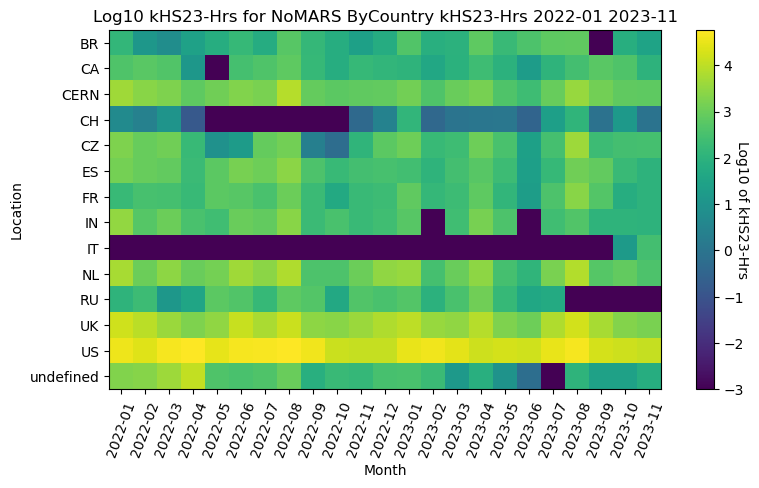

In [21]:
plttag = "%s_%s_%s_%s_%s"%(type,"ByCountry",outunits,lowdate,highdate)
plotme(ByCountry["Total"],outunits,tag=plttag)

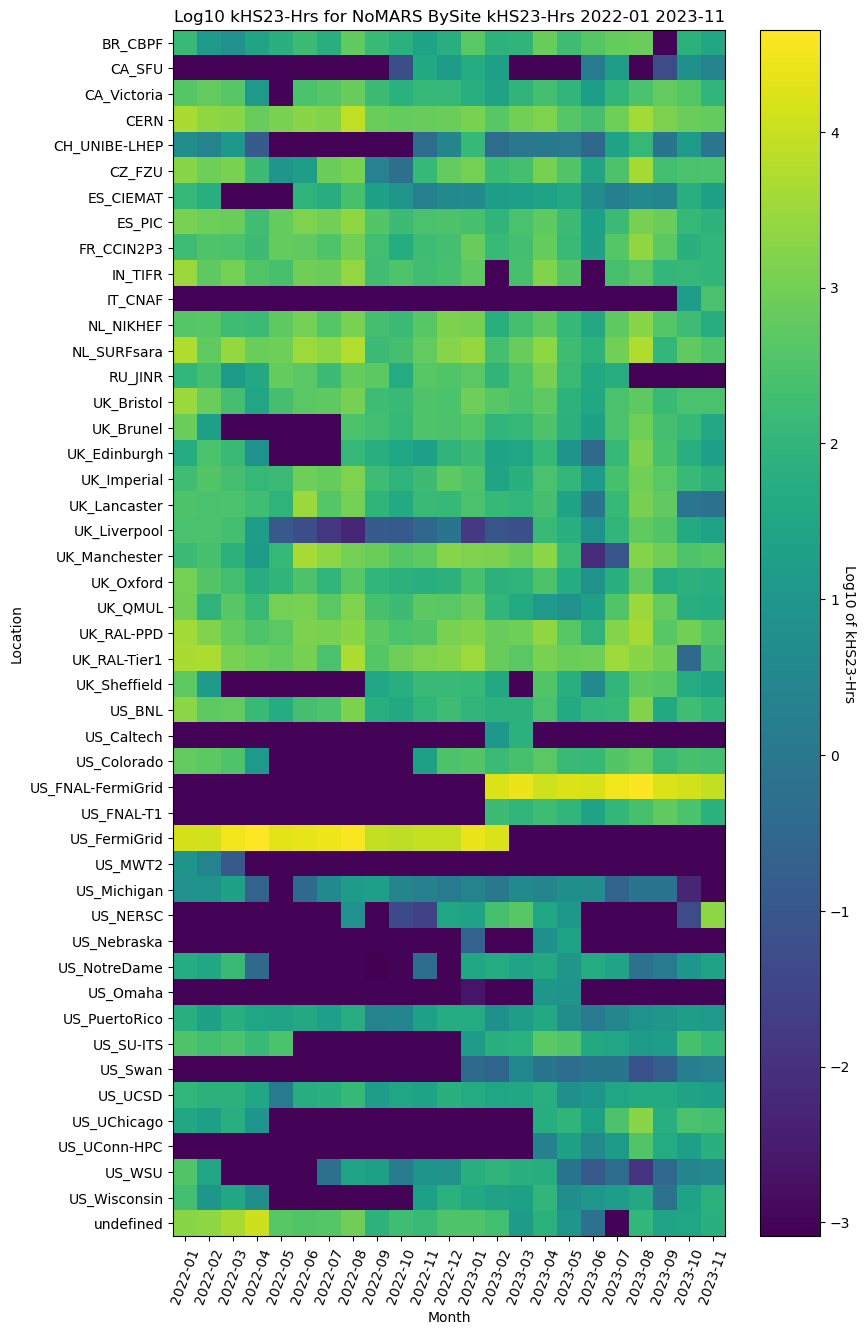

In [22]:
plttag = "%s_%s_%s_%s_%s"%(type,"BySite",outunits,lowdate,highdate)
plotme(BySite["NoMARS"],outunits,tag=plttag)

{'Production': 34119.413416, 'Analysis': 259471.467497, 'MARS': 165651.91674899997, 'NoMARS': 293590.880902, 'Total': 459242.7976509999}


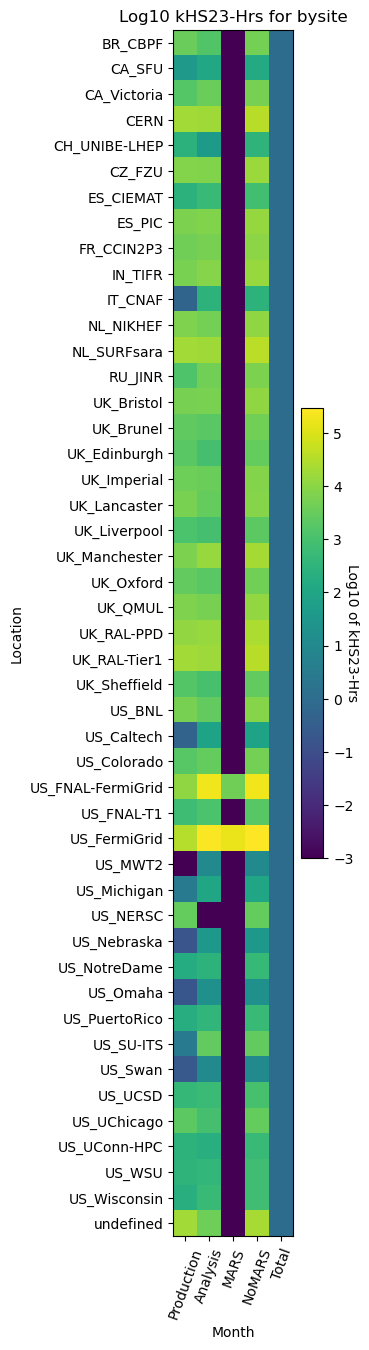

In [23]:
plotme(ByType,outunits,tag="bysite")
print (ByType["US_FermiGrid"])

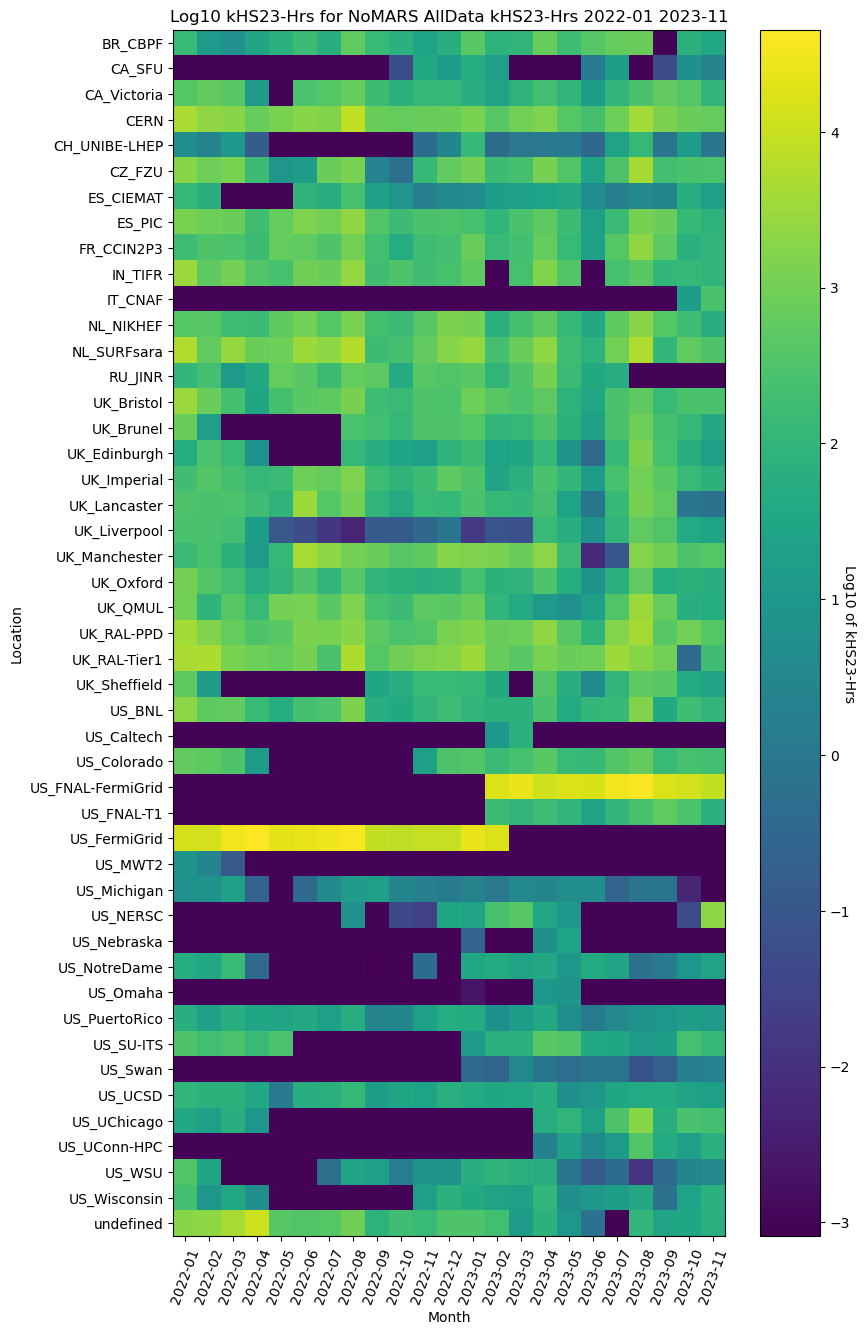

In [24]:
plttag = "%s_%s_%s_%s_%s"%(type,"AllData",outunits,lowdate,highdate)
plotme(Data["NoMARS"],outunits,tag=plttag)